> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This TMDb dataset has been selected and it contains the data on movies and rating.
<br>


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd # import pandas and numpy which is included in pandas 
import pylab as pl
import csv # read and write csv files
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt # to visualize the results
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> Data is relatively clean.
- Missing rows ids are dropped.
- Other missing values aren't significant, so it won't be dropped. <br>
### General Properties

**Observations** Null values in below variables:
- imdb_id
- cast
- homepage
- director
- tagline
- keywords
- overview
- genres
- production_companies

**Steps to Take:**

- imdb_id are significant to identify the records uniquely. Only 10 of 10865 are missing. Hence, we only drop the records with this value as missing.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb_movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
# to find any duplicates
sum(df.duplicated())

1

In [4]:
# to eliminate duplicated data
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64



### Data Cleaning (Dropping rows)

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#removing rows with null values in imdb_id column
df.dropna(subset=['imdb_id'], inplace=True)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [8]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which year that has the highest average vote?

In [9]:
df.groupby('release_year').mean()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,15715.281250,0.458932,6.892796e+05,4.531406e+06,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07
1961,18657.000000,0.422827,1.488290e+06,1.089420e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07
1962,17001.062500,0.454783,1.710066e+06,6.736870e+06,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07
1963,16556.000000,0.502706,2.156809e+06,5.511911e+06,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07
1964,17379.571429,0.412428,9.400753e+05,8.118614e+06,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07
1965,17564.714286,0.342587,2.005860e+06,1.308805e+07,118.171429,52.000000,6.194286,1.388168e+07,9.057670e+07
1966,16514.000000,0.304112,1.251191e+06,1.842102e+06,106.891304,31.739130,6.128261,8.405522e+06,1.237527e+07
1967,17429.700000,0.471154,2.516305e+06,1.844587e+07,104.950000,77.550000,6.242500,1.644849e+07,1.205763e+08
1968,18628.589744,0.484202,1.844590e+06,6.788025e+06,107.282051,108.128205,6.379487,1.156367e+07,4.255388e+07


Next figure is showing the vote average over years. Results show the highest movies vote is between (5.9 , 6.1)

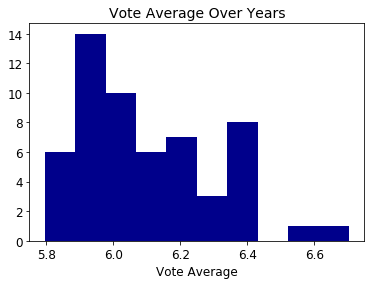

In [10]:
## hist1 is a variable contains the main shape of the histogram 
hist1 = df.groupby('release_year').mean()['vote_average']
plt.hist(hist1, color= 'darkblue')
## below lines are to make the figure looks good 
plt.title('Vote Average Over Years', fontsize=14)
plt.xlabel('Vote Average', fontsize=12 )
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Next figure is showing the revenue over years. Results show the highest movies revenue is between (3.5 , 4.5)

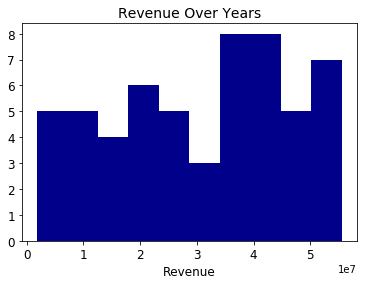

In [11]:
## hist2 is a variable contains the main shape of the histogram 
hist2 = df.groupby('release_year').mean()['revenue']
plt.hist(hist2, color= 'darkblue')
plt.title('Revenue Over Years', fontsize=14)
plt.xlabel('Revenue', fontsize=12)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Next figure is showing the revenue vs vote average over years. Results show the highest movies based on both revenue and vote average.

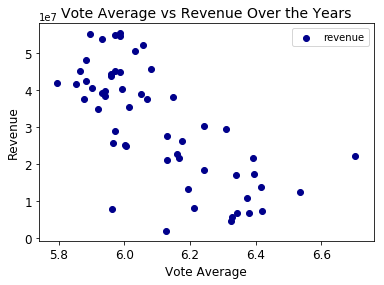

In [12]:
## df_yr_mean is a variable contains the main shape of the scatter plot.

df_yr_mean = df.groupby('release_year').mean()
plt.scatter(x=df_yr_mean['vote_average'], y=df_yr_mean['revenue'], color= 'darkblue')
plt.xlabel('Vote Average', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Vote Average vs Revenue Over the Years', fontsize=14)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.legend()
plt.show()

In [13]:
df_yr_mean.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,56.000000,56.000000,5.600000e+01,5.600000e+01,56.000000,56.000000,56.000000,5.600000e+01,5.600000e+01
mean,32165.603433,0.559693,9.833150e+06,3.076766e+07,105.714644,156.556414,6.104371,1.557752e+07,6.032251e+07
std,52448.343738,0.128434,8.023062e+06,1.574209e+07,5.508458,74.084952,0.200420,7.326850e+06,2.160738e+07
min,13496.075188,0.304112,6.892796e+05,1.842102e+06,96.179331,31.739130,5.795392,4.729510e+06,1.237527e+07
25%,15703.352791,0.469625,2.426431e+06,1.815642e+07,101.910776,98.832785,5.958838,1.088323e+07,4.633366e+07
50%,17469.025000,0.546928,6.906936e+06,3.257984e+07,105.678699,139.040793,6.041295,1.390314e+07,5.802844e+07
75%,19105.754121,0.626934,1.645743e+07,4.293171e+07,107.593247,206.899610,6.242106,1.797158e+07,6.832655e+07
max,296669.068471,1.032126,2.573766e+07,5.549569e+07,124.343750,325.949848,6.703636,3.369195e+07,1.376362e+08


### Research Question 2: Which year that has the lowest revenue?

In [14]:
df = pd.DataFrame(df,columns=['vote_average','revenue'])
print(df)

       vote_average     revenue
0               6.5  1513528810
1               7.1   378436354
2               6.3   295238201
3               7.5  2068178225
4               7.3  1506249360
5               7.2   532950503
6               5.8   440603537
7               7.6   595380321
8               6.5  1156730962
9               8.0   853708609
10              6.2   880674609
11              5.2   183987723
12              7.6    36869414
13              5.8   243637091
14              7.4  1405035767
15              7.4   155760117
16              6.1   325771424
17              7.0   518602163
18              6.8   542351353
19              6.5   650523427
20              6.2   209035668
21              7.3    91709827
22              6.1   470490832
23              5.3   569651467
24              7.3   133346506
25              7.1   682330139
26              6.3   215863606
27              7.6   403802136
28              7.8    88346473
29              6.4   311256926
...     

In [15]:
maxVoteAverageValue = df['vote_average'].max()
array = [maxVoteAverageValue]
print(df.loc[df['vote_average'].isin(array)])

      vote_average  revenue
3894           9.2        0


In [16]:
maxRevenueValue = df['revenue'].min()
array = [maxRevenueValue]
print(df.loc[df['revenue'].isin(array)])

       vote_average  revenue
48              5.3        0
67              5.4        0
74              5.1        0
75              7.7        0
92              5.4        0
93              4.1        0
100             7.0        0
101             5.4        0
103             5.6        0
116             4.5        0
122             5.1        0
133             6.3        0
140             4.5        0
143             7.5        0
145             6.3        0
147             6.6        0
149             5.8        0
151             5.3        0
152             6.0        0
154             5.7        0
156             6.0        0
158             7.2        0
159             7.7        0
164             5.8        0
165             4.8        0
166             5.1        0
169             6.0        0
174             5.2        0
175             6.7        0
176             6.6        0
...             ...      ...
10834           5.1        0
10836           5.8        0
10837         

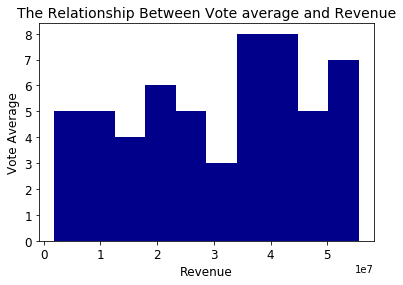

In [17]:
## hist3 is a variable contains the main shape of the histogram 
hist3 = df_yr_mean.groupby('vote_average').mean()['revenue']
plt.hist(hist3, color= 'darkblue')
plt.title('The Relationship Between Vote average and Revenue', fontsize=14)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Vote Average', fontsize=12)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.legend()
plt.show()

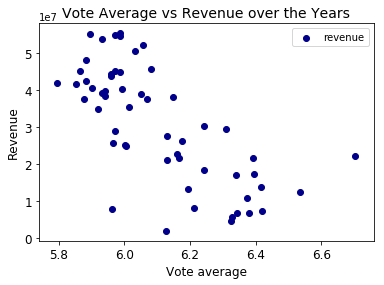

In [18]:
##this scatter plot shows the votes average relationship with years 
##to see the revenues upon vote average

plt.scatter(x=df_yr_mean['vote_average'], y=df_yr_mean['revenue'], color= 'darkblue')
plt.xlabel('Vote average', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Vote Average vs Revenue over the Years', fontsize=14);
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.legend()
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Results:** <br>
The results give an idea about how the average vote is increasing or decreasing through the years by obtaining the heighest value, it will point out that in which year the users have given much attention to vote to movies. Also, by getting the lowest revenue all over the years, we can check which year was lacking to impress the audience and the users.
<br><br>
> **Limitations:** <br>
First of all, in data exploration I have found there are 10865 entries and 10 of them are nulls in imdb_id column. I have dropped nulls then started analysis part. Also, the columns those answer of my questions are clear without nulls or missing rows. Finally, I think there are more columns need to be added, such as original country. 
<br><br><br>

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0